In [218]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [220]:
sensor_data = pd.read_csv("data/data_namuk/sensor_data_all.csv")
sensor_data = sensor_data.rename(columns = {'Unnamed: 0': 'index'})
sensor_data = sensor_data.set_index('index')

In [221]:
sensor_data['label'].value_counts()

5     8587
20    3508
10    3218
15    3102
Name: label, dtype: int64

In [7]:
#print(sensor_data.isna().sum())

In [222]:
sensor_data_target = sensor_data['label']
sensor_data_drop=sensor_data.drop('label', axis=1)
sensor_data_drop.head()

,LAX,LAY,LAZ,LA_mad,LA_max,LA_mean,LA_median,LA_min,LA_quantile,LA_skew,...,RP_max,RP_mean,RP_median,RP_min,RP_quantile,RP_skew,RP_sma,RP_std,RP_sum,RP_var
index,,,,,,,,,,,,,,,,,,,,,
0,160,172,28,61.333333,172,120.000000,160.0,28,160.0,-1.688202,...,50,30.857143,29.0,21,29.0,1.575313,19.961498,9.441550,216,89.142857
1,100,160,124,21.333333,160,128.000000,124.0,100,124.0,0.585583,...,50,31.000000,30.0,21,30.0,1.525910,19.961498,9.416298,217,88.666667
2,20,96,12,35.555556,96,42.666667,20.0,12,20.0,1.674210,...,50,31.000000,30.0,21,30.0,1.525910,19.961498,9.416298,217,88.666667
3,16,80,108,34.666667,108,68.000000,80.0,16,80.0,-1.070915,...,50,30.857143,29.0,21,29.0,1.575313,19.961498,9.441550,216,89.142857
4,212,244,212,14.222222,244,222.666667,212.0,212,212.0,1.732051,...,51,31.142857,30.0,21,30.0,1.598154,30.971429,9.754120,218,95.142857


In [223]:
sensor_data_drop.describe()

,LAX,LAY,LAZ,LA_mad,LA_max,LA_mean,LA_median,LA_min,LA_quantile,LA_skew,...,RP_max,RP_mean,RP_median,RP_min,RP_quantile,RP_skew,RP_sma,RP_std,RP_sum,RP_var
count,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,...,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000
mean,123.402226,132.287157,121.244420,50.825667,191.277328,125.644601,125.857399,59.799077,125.857399,0.006028,...,31.623839,14.853093,14.115232,4.164540,14.115232,0.934523,14.843905,9.222567,103.971654,129.703192
std,73.789386,72.821813,76.999869,22.395027,48.706861,42.455327,56.653730,50.195426,56.653730,1.238426,...,20.916449,10.861800,11.240877,6.269297,11.240877,1.073045,10.817515,6.682056,76.032602,158.918675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.732051,...,0.000000,0.000000,0.000000,0.000000,0.000000,-2.645751,0.057143,0.000000,0.000000,0.000000
25%,60.000000,72.000000,52.000000,33.777778,160.000000,96.000000,84.000000,20.000000,84.000000,-1.263132,...,8.000000,3.571429,3.000000,1.000000,3.000000,0.000000,3.628571,2.380476,25.000000,5.666667
50%,120.000000,140.000000,120.000000,51.555556,204.000000,124.000000,124.000000,48.000000,124.000000,0.000000,...,38.000000,15.571429,14.000000,1.000000,14.000000,1.229634,15.542857,10.106575,109.000000,102.142857
75%,188.000000,196.000000,192.000000,68.444444,232.000000,156.000000,168.000000,88.000000,168.000000,1.235155,...,47.000000,23.857143,24.000000,5.000000,24.000000,1.727889,23.828571,13.098528,167.000000,171.571429
max,252.000000,252.000000,252.000000,111.111111,252.000000,250.666667,252.000000,248.000000,252.000000,1.732051,...,107.000000,35.714286,43.000000,28.000000,43.000000,2.645751,35.657143,40.074336,250.000000,1605.952381


In [224]:
X_train, X_test, y_train, y_test = train_test_split(sensor_data_drop, sensor_data_target, test_size=0.2, random_state=121)

In [225]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
print('예측정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))
#DecisioinTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

예측정확도:0.8819
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


In [226]:
#최적의 파리미터 찾기
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [22,23],
    'min_samples_split' :[12,24]
    }
grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=3, verbose=1,n_jobs=-1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이파 파라미터:', grid_cv.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    4.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.2s finished


GridSearchCV 최고 평균 정확도 수치:0.8587
GridSearchCV 최적 하이파 파라미터: {'max_depth': 22, 'min_samples_split': 12}


In [227]:
#GridSerarchCV 객체의 cv_results_속성을 DataFrame으로 생성
import warnings
warnings.filterwarnings('ignore')
cv_result_df=pd.DataFrame(grid_cv.cv_results_)
#max_depth 파라미터 값과 그때의 테스터 세트, 학습 데이터 세트의 정확도 수치를 추출
#cv_result_df.columns 칼럼에서 명칭확인 시 입력
cv_result_df[['param_max_depth','param_min_samples_split', 'mean_test_score','mean_train_score']]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,22,12,0.858675,0.964364
1,22,24,0.848697,0.935277
2,23,12,0.857860,0.964703
3,23,24,0.848425,0.935583


In [228]:
#아래의 방법도 있고 두번째 직접 모델에 입력해서 넣는 방법이 있는데 장단점이 있음.
#직접 모델에 넣는 방법은 많은 파라미터가 있는 경우 유효함.
best_df_clf = grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print('GridSerarchCV로 결정된 파라미터의 결정 트리 예측 정확도 :{0:.4f}'.format(accuracy))

GridSerarchCV로 결정된 파라미터의 결정 트리 예측 정확도 :0.8765


In [230]:
#많은 파라미터의 튜닝시 일부 파라미터 튜닝 후 고정하여 진행할 경우 이방법이 선호됨.
dt_clf1 = DecisionTreeClassifier(max_depth=22, min_samples_split=12)
dt_clf1.fit(X_train,y_train)
pred = dt_clf1.predict(X_test)
print('DecisionTree 성능향상 예측정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

DecisionTree 성능향상 예측정확도:0.8778


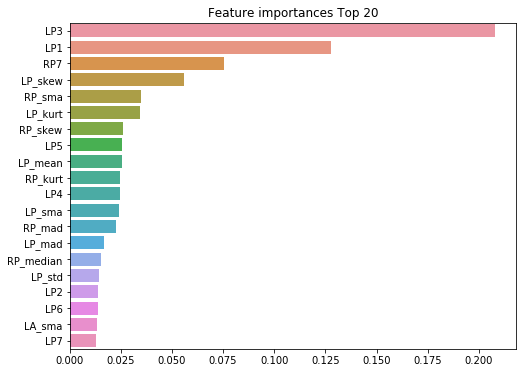

In [231]:
#특성값 중 상위 20위 확인
ftr_importances_values=dt_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=Xtrain.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)

In [232]:
#평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    #precision = precision_score(y_test,pred)
    #recall = recall_score(y_test,pred)
    #f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    #print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f},f1:{3:.4f}'.format(accuracy,precision,recall))
    print('정확도:{0:.4f}'.format(accuracy))
    

In [233]:
get_clf_eval(y_test, pred)

오차행렬
[[1622   60    0    0]
 [  83  517   46   37]
 [   1   48  486   84]
 [   1   26   64  608]]
정확도:0.8778


In [266]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
#그림이 너무 커서 비주얼스튜디오로 그려야함.
export_graphviz(dt_clf, out_file='dt_tree.dot', impurity=True, filled=True)
#class_names=iris_data.target_names,feature_names=iris_data.feature_names에 대한 속성확인 후 적용
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='dt_tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.473737 to fit


'dt_tree.png.png'

In [234]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
#랜덤포레스트 학습 및 별도의 테스트 세트로 예측성능평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('랜덤포레스트 정확도 : {0:.4f}'.format(accuracy))
print('랜덤포레스트 기본 하이퍼 파라미터:\n',rf_clf.get_params())

랜덤포레스트 정확도 : 0.9101
랜덤포레스트 기본 하이퍼 파라미터:
 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [236]:
#최적의 파리미터 찾기
params = {
    'n_estimators':[100],
    'max_depth' : [18,19],
    'min_samples_leaf' :[1,2],
    'min_samples_split' :[2,3]
    }
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 랜덤포레스트 최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 랜덤포레스트 최적 하이파 파라미터:', grid_cv.best_params_)

GridSearchCV 랜덤포레스트 최고 예측 정확도:0.9010
GridSearchCV 랜덤포레스트 최적 하이파 파라미터: {'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


In [202]:
"""cv_result_df=pd.DataFrame(grid_cv.cv_results_)
#max_depth 파라미터 값과 그때의 테스터 세트, 학습 데이터 세트의 정확도 수치를 추출
#cv_result_df.columns 칼럼에서 명칭확인 시 입력
cv_result_df[['param_max_depth','param_min_samples_split', 'mean_test_score','mean_train_score']]"""

"cv_result_df=pd.DataFrame(grid_cv.cv_results_)\n#max_depth 파라미터 값과 그때의 테스터 세트, 학습 데이터 세트의 정확도 수치를 추출\n#cv_result_df.columns 칼럼에서 명칭확인 시 입력\ncv_result_df[['param_max_depth','param_min_samples_split', 'mean_test_score','mean_train_score']]"

In [237]:
best_df_clf = grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print('GridSerarchCV로 결정된 파라미터의 랜덤 트리 예측 정확도 :{0:.4f}'.format(accuracy))

GridSerarchCV로 결정된 파라미터의 랜덤 트리 예측 정확도 :0.9343


In [238]:
rf_clf1 = RandomForestClassifier(n_estimators=100,max_depth=19,min_samples_leaf=1,min_samples_split=3)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print('예측정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측정확도:0.9318


In [262]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file='rf_clf1_tree.dot', impurity=True, filled=True) 
#class_names=iris_data.target_names,feature_names=iris_data.feature_names에 대한 속성확인 후 적용
import graphviz
with open('rf_clf1_tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='rf_clf1_tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.473737 to fit


'rf_clf1_tree.png.png'

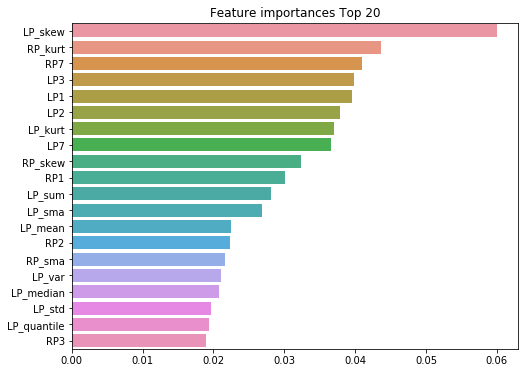

In [239]:
#특성값 중 상위 20위 확인
ftr_importances_values=rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=Xtrain.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)

In [240]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [241]:
#GBM의 시간 측정을 위함 시작시간 설정
start_time =time.time()
#GBM모델 셋업
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
print("GBM 수행시간 : {0:1.4f}초".format(time.time()-start_time))
print('GBM 기본 하이퍼 파라미터:\n',gb_clf.get_params())

GBM 정확도:0.8526
GBM 수행시간 : 19.2139초
GBM 기본 하이퍼 파라미터:
 {'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [242]:
#최적의 파리미터 찾기
gb_clf=GradientBoostingClassifier(random_state=0,n_estimators = 100 )
params = {
    'learning_rate' :[0.05,0.1],
    'max_depth' : [3,6]    
    }
grid_cv=GridSearchCV(gb_clf, param_grid=params, scoring='accuracy', cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(X_train,y_train)
print('GradientBoosting 최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))
print('GradientBoosting 최적 하이파 파라미터:', grid_cv.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   17.1s remaining:   51.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   39.1s finished


GBM 최고 예측 정확도:0.9059
GBM 최적 하이파 파라미터: {'learning_rate': 0.1, 'max_depth': 6}


In [243]:
#GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
ab_accuracy = accuracy_score(y_test, gb_pred)
print('GradientBoosting 정확도 : {0:.4f}'.format(gb_accuracy))

GradientBoosting 정확도 : 0.8526


In [245]:
#GridSearchCV에서 적용한 파라미터 적용
gb_clf1 = GradientBoostingClassifier(learning_rate= 0.11, max_depth= 6, n_estimators = 100) #n_estimators= 300
gb_clf1.fit(X_train,y_train)
pred = gb_clf1.predict(X_test)
print('GradientBoosting 예측정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

GradientBoosting 예측정확도:0.9289


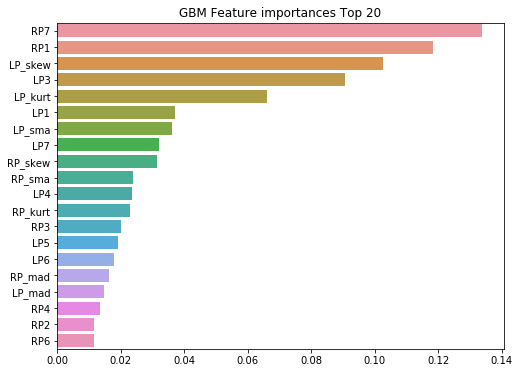

In [246]:
#특성값 중 상위 20위 확인
ftr_importances_values=gb_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=Xtrain.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('GBM Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)

In [247]:
#사이킷런 래퍼 SGBoost 클래스인 XGBClassifier임포트
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train,y_train)
pred = xgb_clf.predict(X_test)

In [248]:
get_clf_eval(y_test,pred)

오차행렬
[[1670   12    0    0]
 [ 225  275   96   87]
 [   5   26  465  123]
 [   3   28   95  573]]
정확도:0.8099


In [250]:
xgb_clf = XGBClassifier(random_state=0, n_estimators=200, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='mlogloss',
           eval_set=evals, verbose=True) #merror
st100_pred = xgb_clf.predict(X_test)

[0]	validation_0-mlogloss:1.29949
Will train until validation_0-mlogloss hasn't improved in 100 rounds.
[1]	validation_0-mlogloss:1.22998
[2]	validation_0-mlogloss:1.16989
[3]	validation_0-mlogloss:1.11688
[4]	validation_0-mlogloss:1.07142
[5]	validation_0-mlogloss:1.03005
[6]	validation_0-mlogloss:0.994663
[7]	validation_0-mlogloss:0.962535
[8]	validation_0-mlogloss:0.93327
[9]	validation_0-mlogloss:0.908417
[10]	validation_0-mlogloss:0.884425
[11]	validation_0-mlogloss:0.864297
[12]	validation_0-mlogloss:0.843954
[13]	validation_0-mlogloss:0.825229
[14]	validation_0-mlogloss:0.808485
[15]	validation_0-mlogloss:0.79305
[16]	validation_0-mlogloss:0.779419
[17]	validation_0-mlogloss:0.767145
[18]	validation_0-mlogloss:0.755989
[19]	validation_0-mlogloss:0.744868
[20]	validation_0-mlogloss:0.734518
[21]	validation_0-mlogloss:0.725433
[22]	validation_0-mlogloss:0.717586
[23]	validation_0-mlogloss:0.709051
[24]	validation_0-mlogloss:0.700974
[25]	validation_0-mlogloss:0.694292
[26]	validat

In [251]:
get_clf_eval(y_test,pred)
print('XGBoost 기본 하이퍼 파라미터:\n',xgb_clf.get_params())

오차행렬
[[1670   12    0    0]
 [ 225  275   96   87]
 [   5   26  465  123]
 [   3   28   95  573]]
정확도:0.8099
XGBoost 기본 하이퍼 파라미터:
 {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 200, 'n_jobs': 1, 'nthread': None, 'objective': 'multi:softprob', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}


In [252]:
#최적의 파리미터 찾기
xgb_clf = XGBClassifier(random_state=0, n_estimators=100)
params = {
    'learning_rate' :[0.05,0.1],
    'max_depth' : [3,6],
    'min_child_weight':[1,3],
    'colsample_bytree' :[0.5,0.75]
    }
grid_cv=GridSearchCV(xgb_clf, param_grid=params, scoring='accuracy', cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(X_train,y_train)
print('XGB 최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))
print('XGB 최적 하이파 파라미터:', grid_cv.best_params_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   42.9s finished


XGB 최고 예측 정확도:0.8850
XGB 최적 하이파 파라미터: {'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3}


In [253]:
#GridSearchCV를 그래프 작성용
xgb_clf1 = XGBClassifier(random_state=0, colsample_bytree= 0.75, learning_rate= 0.1, max_depth= 6, 
                         min_child_weight= 3, n_estimators= 100)
#evals = [(X_test, y_test)]
xgb_clf1.fit(X_train, y_train, eval_metric='merror') #merror, eval_set=evals,early_stopping_rounds=100
xgb_clf1.fit(X_train,y_train)
pred = xgb_clf1.predict(X_test)
print('예측정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측정확도:0.9033


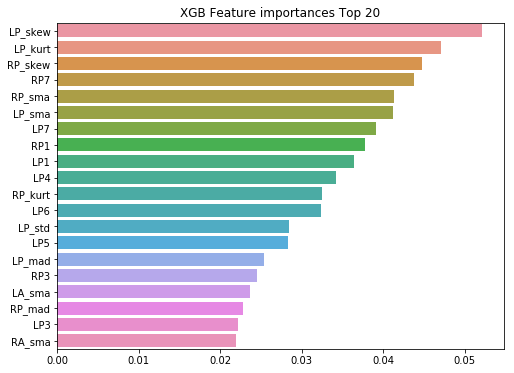

In [254]:
#특성값 중 상위 20위 확인
ftr_importances_values=xgb_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=Xtrain.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('XGB Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)

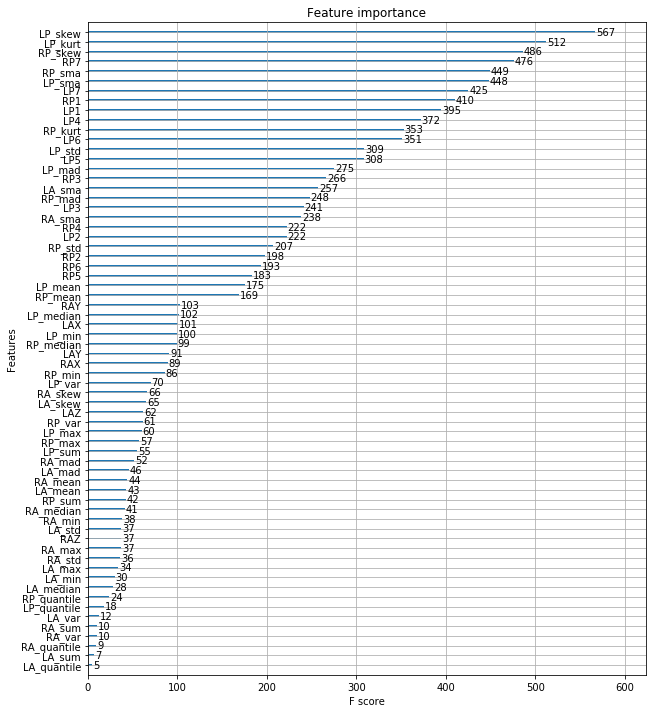

In [255]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_clf1, ax=ax)

In [256]:
#LightGBM의 파이썬패키지 입력
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=300)
#ligtgbm도 조기중단 수행지정
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric ="logloss",
            eval_set=evals, verbose=True)


[1]	valid_0's multi_logloss: 1.18062	valid_0's multi_logloss: 1.18062
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.0939	valid_0's multi_logloss: 1.0939
[3]	valid_0's multi_logloss: 1.02003	valid_0's multi_logloss: 1.02003
[4]	valid_0's multi_logloss: 0.956002	valid_0's multi_logloss: 0.956002
[5]	valid_0's multi_logloss: 0.899302	valid_0's multi_logloss: 0.899302
[6]	valid_0's multi_logloss: 0.848361	valid_0's multi_logloss: 0.848361
[7]	valid_0's multi_logloss: 0.802985	valid_0's multi_logloss: 0.802985
[8]	valid_0's multi_logloss: 0.762662	valid_0's multi_logloss: 0.762662
[9]	valid_0's multi_logloss: 0.726149	valid_0's multi_logloss: 0.726149
[10]	valid_0's multi_logloss: 0.693011	valid_0's multi_logloss: 0.693011
[11]	valid_0's multi_logloss: 0.662424	valid_0's multi_logloss: 0.662424
[12]	valid_0's multi_logloss: 0.634134	valid_0's multi_logloss: 0.634134
[13]	valid_0's multi_logloss: 0.608586	valid_0's multi_logloss: 0.608586
[14]	

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=300, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [170]:
pred = lgbm_clf.predict(X_test)
get_clf_eval(y_test, pred)
print('LGBM 기본 하이퍼 파라미터:\n',lgbm_clf.get_params())

오차행렬
[[506  29   0   0]
 [ 36 445   0   0]
 [  2   1 458   1]
 [  0   0  10 530]]
정확도:0.9609
LGBM 기본 하이퍼 파라미터:
 {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 300, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [174]:
#최적의 파리미터 찾기
lgbm_clf = LGBMClassifier(n_estimators=100) #속도향상을 위해 100으로 재설정
params = {
    'learning_rate': [0.05,0.1],
    'num_leaves' :[32,64],
    'max_depth' : [128,160],
    'min_child_samples':[60,100],
    'subsample' :[0.8,1]
    }
grid_cv=GridSearchCV(lgbm_clf, param_grid=params, scoring='accuracy', verbose=1, n_jobs=-1)
grid_cv.fit(X_train,y_train, early_stopping_rounds=30, eval_metric="logloss",
           eval_set=[(X_train, y_train), (X_test,y_test)])
print('LGBM 최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))
print('LGBM 최적 하이파 파라미터:', grid_cv.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  1.1min finished


[1]	training's multi_logloss: 1.25217	training's multi_logloss: 1.25217	valid_1's multi_logloss: 1.25609	valid_1's multi_logloss: 1.25609
Training until validation scores don't improve for 30 rounds.
[2]	training's multi_logloss: 1.14446	training's multi_logloss: 1.14446	valid_1's multi_logloss: 1.15347	valid_1's multi_logloss: 1.15347
[3]	training's multi_logloss: 1.04987	training's multi_logloss: 1.04987	valid_1's multi_logloss: 1.06305	valid_1's multi_logloss: 1.06305
[4]	training's multi_logloss: 0.969579	training's multi_logloss: 0.969579	valid_1's multi_logloss: 0.986964	valid_1's multi_logloss: 0.986964
[5]	training's multi_logloss: 0.898353	training's multi_logloss: 0.898353	valid_1's multi_logloss: 0.918699	valid_1's multi_logloss: 0.918699
[6]	training's multi_logloss: 0.835158	training's multi_logloss: 0.835158	valid_1's multi_logloss: 0.858887	valid_1's multi_logloss: 0.858887
[7]	training's multi_logloss: 0.777458	training's multi_logloss: 0.777458	valid_1's multi_logloss:

In [176]:
#최적의 파라미터로 재모델링
lgb_clf1 = LGBMClassifier(random_state=0, learning_rate= 0.1, max_depth= 128, min_child_samples= 60, num_leaves= 32,
                          subsample= 0.8, n_estimators= 500)
evals = [(X_test, y_test)]
lgb_clf1.fit(X_train, y_train, eval_metric='logloss',eval_set=evals,verbose=True,early_stopping_rounds=100) #merror, eval_set=evals,early_stopping_rounds=100
lgb_clf1.fit(X_train,y_train)
pred = lgb_clf1.predict(X_test)
print('예측정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

[1]	valid_0's multi_logloss: 1.25609	valid_0's multi_logloss: 1.25609
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.15347	valid_0's multi_logloss: 1.15347
[3]	valid_0's multi_logloss: 1.06305	valid_0's multi_logloss: 1.06305
[4]	valid_0's multi_logloss: 0.986964	valid_0's multi_logloss: 0.986964
[5]	valid_0's multi_logloss: 0.918699	valid_0's multi_logloss: 0.918699
[6]	valid_0's multi_logloss: 0.858887	valid_0's multi_logloss: 0.858887
[7]	valid_0's multi_logloss: 0.804408	valid_0's multi_logloss: 0.804408
[8]	valid_0's multi_logloss: 0.755804	valid_0's multi_logloss: 0.755804
[9]	valid_0's multi_logloss: 0.712194	valid_0's multi_logloss: 0.712194
[10]	valid_0's multi_logloss: 0.673422	valid_0's multi_logloss: 0.673422
[11]	valid_0's multi_logloss: 0.638175	valid_0's multi_logloss: 0.638175
[12]	valid_0's multi_logloss: 0.606407	valid_0's multi_logloss: 0.606407
[13]	valid_0's multi_logloss: 0.576314	valid_0's multi_logloss: 0.576314
[14

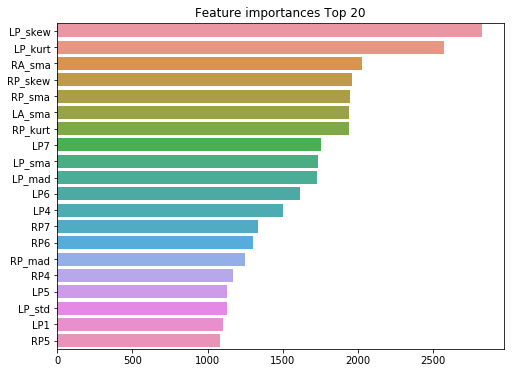

In [258]:
#특성값 중 상위 20위 확인
ftr_importances_values=lgb_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=Xtrain.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)

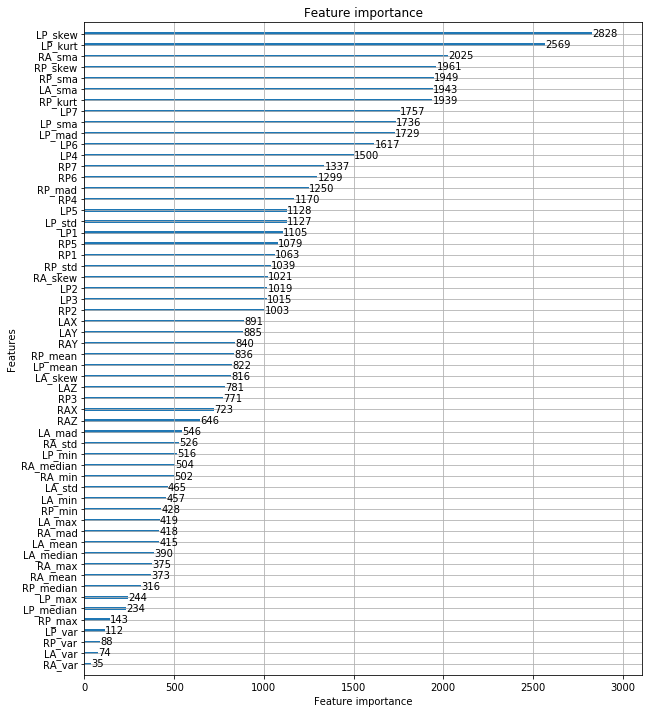

In [259]:
#plot_importance로 피처 중요도 시각화
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_clf1, ax=ax)

1. 과거에 했었던 파일 확인해서 결과값 확인할 수 있는 표 작성하기
 <br>1.1 backup_namuk_rest/ python_project
2. 원본데이터로 돌려보기
3. 출력된 결과값 정리하기
